# Fast Flow

In [1]:
import pandas as pd
#trial,payload,size,task_size,workers,time

#load sequential times
seq_times = pd.read_csv('results/sequential.csv')
seq_times = seq_times.drop(columns=['trial'])

#load parallel base times
par_times = pd.read_csv('results/naive_ff.csv')
par_times = par_times[par_times['time'] > 0]
par_times = par_times.drop(columns=['trial'])

#load parallel working emitter times
#we_times = pd.read_csv('results/working_emitter_ff.csv')

In [2]:
par_times.head()

,payload,size,task_size,workers,time
0,1,10000,-1,1,0.001171
1,1,10000,-1,3,0.001497
2,1,10000,-1,7,0.001608
3,1,10000,-1,15,0.002245
4,1,10000,-1,31,0.004342


we first keep the best time for each size, and then we use this to compare based on the payload

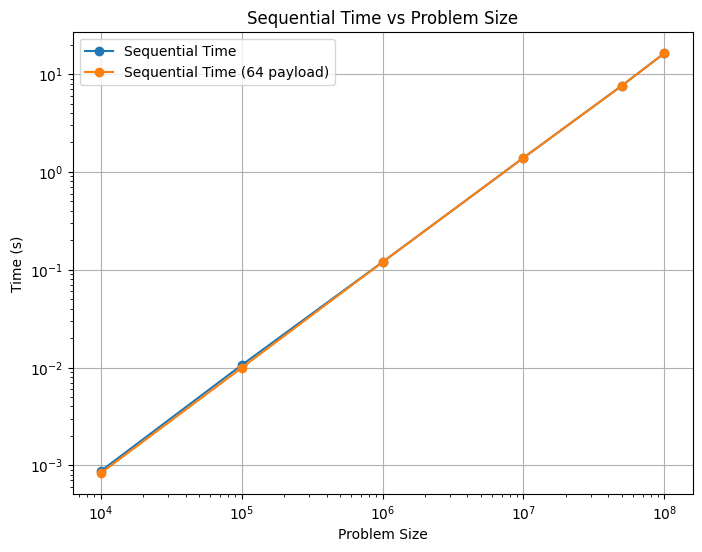

In [3]:
import matplotlib.pyplot as plt

small = seq_times[seq_times['payload'] == 1]
big = seq_times[seq_times['payload'] == 64]


# Plot sequential time vs problem size
plt.figure(figsize=(8, 6))
plt.plot(small['size'], small['time'], marker='o', label='Sequential Time')
plt.plot(big['size'], big['time'], marker='o', label='Sequential Time (64 payload)')
plt.xlabel('Problem Size')
plt.ylabel('Time (s)')
plt.title('Sequential Time vs Problem Size')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

seem that the payload size does not impact much on a single machine, so from now on all test are done using a payload of 1 to speedup the process and consume less resources. Although the sotring time is not influenced the total time required to generate the array is significantly higher.

In [4]:
par_times = par_times.groupby(['size', 'workers']).agg({'time': 'min'}).reset_index()
par_times.head()

,size,workers,time
0,10000,1,0.001171
1,10000,3,0.001011
2,10000,7,0.001088
3,10000,15,0.002050
4,10000,31,0.004137


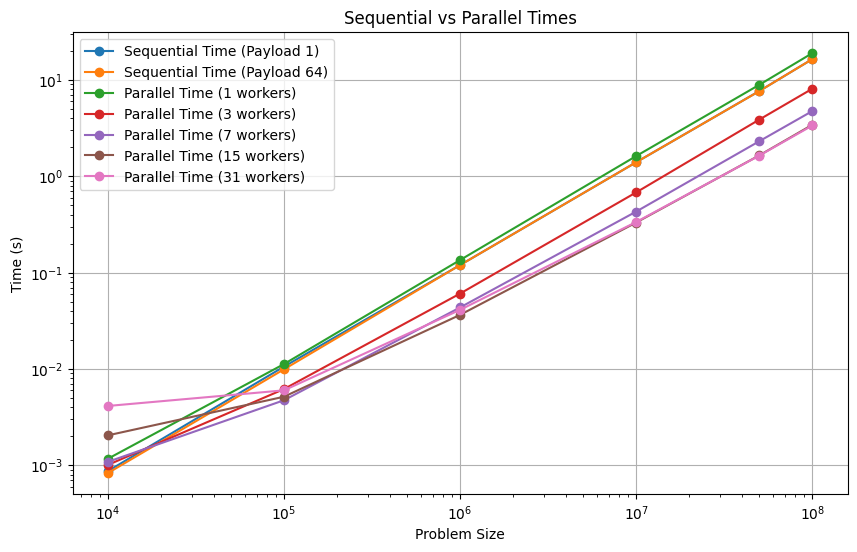

In [7]:
plt.figure(figsize=(10, 6))

# Plot sequential times
plt.plot(small['size'], small['time'], marker='o', label='Sequential Time (Payload 1)')
plt.plot(big['size'], big['time'], marker='o', label='Sequential Time (Payload 64)')

# Plot parallel times for each number of workers
for workers in par_times['workers'].unique():
	worker_times = par_times[par_times['workers'] == workers]
	plt.plot(worker_times['size'], worker_times['time'], marker='o', label=f'Parallel Time ({workers} workers)')

# Configure plot
plt.xlabel('Problem Size')
plt.ylabel('Time (s)')
plt.title('Sequential vs Parallel Times')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()